In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# input_image = "sample.jpg"
# input_image = "sample2.jpg"
# input_image = "sample3.jpg"
input_image = "sample4.jpg"

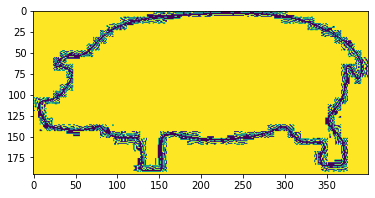

In [28]:
src = cv2.imread(input_image, 1) # read input image
# find max and min of the image
max_threshold = np.max(src)
# second max value
min_threshold = np.max(src[src < max_threshold])
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # convert to grayscale
ret, thresh = cv2.threshold(gray, min_threshold, max_threshold, cv2.THRESH_BINARY)

plt.imshow(thresh)

Counture found :  595
Largest contour index :  91


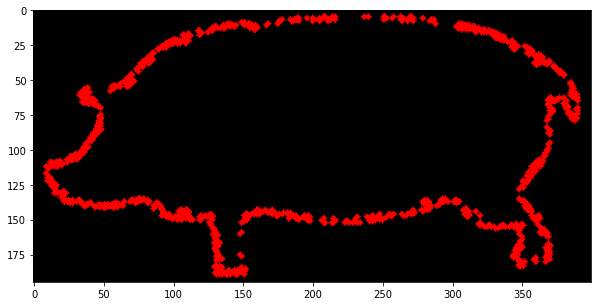

In [29]:
# Finding contours for the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# create hull array for convex hull points
hull = []
# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))
# create an empty black image
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
color_contours = (0, 255, 0) # green - color for contours
color = (255, 0, 0) # blue - color for convex hull BGR

print("Counture found : ", len(contours))

# find the largest contour
outer_contour_index = 0
outer_contour_area = 0
for i in range(len(contours)):
    if len(contours[i]) > 4 and (cv2.contourArea(contours[i]) > outer_contour_area):
        outer_contour_area = cv2.contourArea(contours[i])
        outer_contour_index = i
print("Largest contour index : ", outer_contour_index)

outer_contour = contours[outer_contour_index]

for i in range(len(outer_contour)):
    # make drawing[outer_contour[i][1]][outer_contour[i][0]] = color with a width of 3
    cv2.circle(drawing, (outer_contour[i][0][0], outer_contour[i][0][1]), 2, color, -1)

fig = plt.figure(figsize=(10, 10))
plt.imshow(drawing)